# Proyek Analisis Data: [Bike Sharing Data]
- **Nama:** Muhammad Gery Setiawan Yose
- **Email:** geryyose18@gmail.com
- **ID Dicoding:** geryyose

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi alam terhadap jumlah penyewa sepeda?
- Bagaimana pengaruh hari libur dan hari kerja terhadap jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Pada tahap ini kita berhasil mengimpor data Bike Sharing Datset tanpa kendala. Penjelasan data:
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
		** 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		** 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		** 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		** 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)
* atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

### Assessing Data

**Data day**

In [5]:
# Check Data Type
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Check missing values
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# Check duplicate value
print("Jumlah duplikasi pada data day: ", day_df.duplicated().sum())

Jumlah duplikasi pada data day:  0


In [8]:
# Check outlier value
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada data day tidak terdapat missing value, duplicate value, dan outlier. Namun terdapat kesalahan data type pada kolom dteday yang akan diubah dari object menjadi datetime

**Data Hour**

In [9]:
# Check Data Type
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Check missing values
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
# Check duplicate value
print("Jumlah duplikasi pada data hour: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data hour:  0


In [12]:
# Check outlier value
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada data hour tidak terdapat missing value, duplicate value, dan outlier. Namun terdapat kesalahan data type pada kolom dteday yang akan diubah dari object menjadi datetime

### Cleaning Data

**Data Day**

In [13]:
# Mengubah nilai kolom yang berisikan angka menjadi keterangan

day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

day_df['workingday'] = day_df['workingday'].map({0: 'No', 1: 'Yes'})

day_df['holiday'] = day_df['holiday'].map({0: 'No', 1: 'Yes'})

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Rain/Snow', 4: 'Severe Weather'})

In [14]:
# Mengubah tipe data
day_df['dteday'] = pd.to_datetime(day_df.dteday)
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Hal ini dilakukan agar pada bagian EDA dan visualisasi data lebih enak dibaca

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,No,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Data Hour**

In [16]:
# Menghilangkan data hour karena data hour tidak digunakan untuk menganalisis pertanyaan bisnis yang diajukan
del hour_df

**Insight:**
Semua kendala sudah di perbaiki dan benar.

## Exploratory Data Analysis (EDA)

Penyewa sepeda terhadap kondisi cuaca

In [17]:
day_df.groupby(by='weathersit').agg({
    'casual': ['min', 'max', 'mean','sum'],
    'registered': ['min', 'max', 'mean','sum'],
    'cnt': ['min', 'max', 'mean','sum']
})

<ipython-input-17-41c6aa8a369e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


casual                           registered        \
                       min   max        mean     sum        min   max   
weathersit                                                              
Clear/Partly Cloudy     15  3410  964.030238  446346        416  6946   
Light Rain/Snow          2  1264  185.476190    3895         20  4324   
Misty/Cloudy             9  3155  687.352227  169776        491  6844   

                                           cnt                              
                            mean      sum  min   max         mean      sum  
weathersit                                                                  
Clear/Partly Cloudy  3912.755940  1811606  431  8714  4876.786177  2257952  
Light Rain/Snow      1617.809524    33974   22  4639  1803.285714    37869  
Misty/Cloudy         3348.510121   827082  605  8362  4035.862348   996858

Kondisi alam berdasarkan bulan

In [18]:
day_df.groupby(by='mnth').agg({
    'temp': ['min', 'max', 'mean'],
    'atemp': ['min', 'max', 'mean'],
    'hum': ['min', 'max', 'mean'],
    'windspeed': ['min', 'max', 'mean']
})

<ipython-input-18-655355a0343e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='mnth').agg({


temp                         atemp                           hum  \
           min       max      mean       min       max      mean       min   
mnth                                                                         
Apr   0.300000  0.664167  0.469999  0.283454  0.614925  0.457081  0.254167   
Aug   0.635833  0.793333  0.708582  0.242400  0.751267  0.651475  0.415000   
Dec   0.215833  0.475833  0.324031  0.220333  0.469054  0.326160  0.441250   
Feb   0.127500  0.521667  0.299226  0.101658  0.511983  0.299731  0.187917   
Jan   0.059130  0.425000  0.236444  0.079070  0.415383  0.239796  0.311250   
Jul   0.595833  0.861667  0.755470  0.549912  0.840896  0.704094  0.396250   
Jun   0.540833  0.834167  0.684097  0.525892  0.786613  0.638246  0.305000   
Mar   0.198333  0.601667  0.390539  0.200133  0.570067  0.381954  0.000000   
May   0.414167  0.775000  0.594798  0.404650  0.725383  0.565662  0.360417   
Nov   0.245833  0.530000  0.369220  0.248742  0.524612  0.367359  0.333478   
Oct   0.254167  0.657500  0.485012  0.227913  0.607975  0.471973  0.463333   
Sep   0.469167  0.753333  0.616485  0.461475  0.708983  0.579299  0.467083   

                         windspeed                      
           max      mean       min       max      mean  
mnth                                                    
Apr   0.888333  0.588063  0.065929  0.388067  0.234482  
Aug   0.850000  0.637730  0.070283  0.375617  0.172918  
Dec   0.970417  0.666041  0.047275  0.407346  0.176609  
Feb   0.929167  0.567465  0.045408  0.507463  0.215684  
Jan   0.911250  0.585828  0.073396  0.415429  0.206303  
Jul   0.865417  0.597876  0.080850  0.284813  0.166059  
Jun   0.833333  0.575806  0.077125  0.347642  0.185420  
Mar   0.948261  0.588475  0.089558  0.441563  0.222699  
May   0.922500  0.688958  0.074637  0.342667  0.182989  
Nov   0.962500  0.624876  0.046650  0.376871  0.183801  
Oct   0.906250  0.693761  0.022392  0.422275  0.175205  
Sep   0.972500  0.714714  0.050379  0.357587  0.165945

Penyewa sepeda terhadap musim

In [19]:
day_df.groupby(by='season').agg({
    'casual': ['min', 'max', 'mean','sum'],
    'registered': ['min', 'max', 'mean','sum'],
    'cnt': ['min', 'max', 'mean','sum']
})

<ipython-input-19-c2f11f69d1e2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual                            registered                     \
          min   max         mean     sum        min   max         mean   
season                                                                   
Fall      118  3160  1202.611702  226091        889  6917  4441.691489   
Spring      9  3155   334.928177   60622        416  5315  2269.204420   
Summer    120  3410  1106.097826  203522        674  6456  3886.233696   
Winter      2  3031   729.112360  129782         20  6946  3999.050562   

                 cnt                              
           sum   min   max         mean      sum  
season                                            
Fall    835038  1115  8714  5644.303191  1061129  
Spring  410726   431  7836  2604.132597   471348  
Summer  715067   795  8362  4992.331522   918589  
Winter  711831    22  8555  4728.162921   841613

Penyewa sepeda terhadap bulan

In [21]:
result1 = day_df.groupby(by='mnth').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum']
})

result1[('casual', 'mean')] = result1[('casual', 'mean')].round(1)
result1[('registered', 'mean')] = result1[('registered', 'mean')].round(1)
result1[('cnt', 'mean')] = result1[('cnt', 'mean')].round(1)

result_sorted1 = result1.sort_values(by=('cnt', 'sum'), ascending=False)
result_sorted1

<ipython-input-21-5cd1dd979881>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result1 = day_df.groupby(by='mnth').agg({


casual        registered             cnt        
        mean    sum       mean     sum    mean     sum
mnth                                                  
Aug   1161.9  72039     4502.5  279155  5664.4  351194
Jun   1231.8  73906     4540.6  272436  5772.4  346342
Sep   1172.0  70323     4594.5  275668  5766.5  345991
Jul   1260.6  78157     4303.1  266791  5563.7  344948
May   1214.3  75285     4135.5  256401  5349.8  331686
Oct    963.9  59760     4235.4  262592  5199.2  322352
Apr   1013.4  60802     3471.5  208292  4484.9  269094
Nov    610.0  36603     3637.1  218228  4247.2  254831
Mar    716.8  44444     2975.4  184476  3692.3  228920
Dec    349.9  21693     3053.9  189343  3403.8  211036
Feb    262.5  14963     2392.8  136389  2655.3  151352
Jan    194.2  12042     1982.1  122891  2176.3  134933

Penyewa sepeda terhadap hari

In [22]:
day_df.groupby(by='weekday').agg({
    'casual': ['min', 'max', 'mean','sum'],
    'registered': ['min', 'max', 'mean','sum'],
    'cnt': ['min', 'max', 'mean','sum']
})

<ipython-input-22-aab60a053da1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


casual                            registered                     \
           min   max         mean     sum        min   max         mean   
weekday                                                                   
Fri         38  2469   752.288462   78238       1129  6917  3938.000000   
Mon          2  3065   674.133333   70784         20  6435  3663.990476   
Sat         57  3410  1465.257143  153852        570  5966  3085.285714   
Sun         54  3283  1338.295238  140521        451  5657  2890.533333   
Thu         15  1405   590.961538   61460        416  6781  4076.298077   
Tue          9  1348   556.182692   57843        573  6697  3954.480769   
Wed          9  2562   551.144231   57319        432  6946  3997.394231   

                  cnt                             
            sum   min   max         mean     sum  
weekday                                           
Fri      409552  1167  8362  4690.288462  487790  
Mon      384719    22  7525  4338.123810  455503  
Sat      323955   627  8714  4550.542857  477807  
Sun      303506   605  8227  4228.828571  444027  
Thu      423935   431  7804  4667.259615  485395  
Tue      411266   683  7767  4510.663462  469109  
Wed      415729   441  8173  4548.538462  473048

Penyewa sepeda terhadap hari kerja

In [23]:
day_df.groupby(by='workingday').agg({
    'casual': ['min', 'max', 'mean','sum'],
    'registered': ['min', 'max', 'mean','sum'],
    'cnt': ['min', 'max', 'mean','sum']
})

<ipython-input-23-b264c4977803>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


casual                            registered                     \
              min   max         mean     sum        min   max         mean   
workingday                                                                   
No             54  3410  1371.134199  316732        451  5966  2959.034632   
Yes             2  2469   606.570000  303285         20  6946  3978.250000   

                     cnt                              
                sum  min   max         mean      sum  
workingday                                            
No           683537  605  8714  4330.168831  1000269  
Yes         1989125   22  8362  4584.820000  2292410

Penyewa sepeda terhadap hari libur

In [24]:
day_df.groupby(by='holiday').agg({
    'casual': ['min', 'max', 'mean','sum'],
    'registered': ['min', 'max', 'mean','sum'],
    'cnt': ['min', 'max', 'mean','sum']
})

<ipython-input-24-dace1d8c048f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


casual                            registered                     \
           min   max         mean     sum        min   max         mean   
holiday                                                                   
No           2  3410   841.771831  597658         20  6946  3685.332394   
Yes        117  3065  1064.714286   22359        573  5172  2670.285714   

                   cnt                              
             sum   min   max         mean      sum  
holiday                                             
No       2616586    22  8714  4527.104225  3214244  
Yes        56076  1000  7403  3735.000000    78435

**Notes**: data ini gabungan 2 tahun yaitu tahun 2011 dan 2012

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


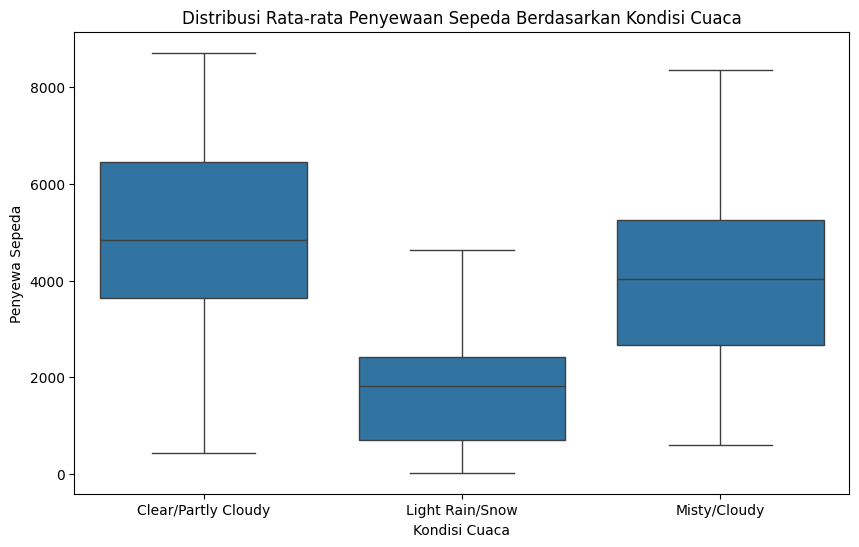

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Distribusi Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Penyewa Sepeda')
plt.show()

Dari hasil visualisasi diatas menunjukan bahwa kondisi cuaca mempengaruhi penyewaan sepeda dengan cuaca *clear/partly cloudy* memiliki penyewa paling banyak sedangkan cuaca *light rain/snow* memiliki penyewa paling rendah.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


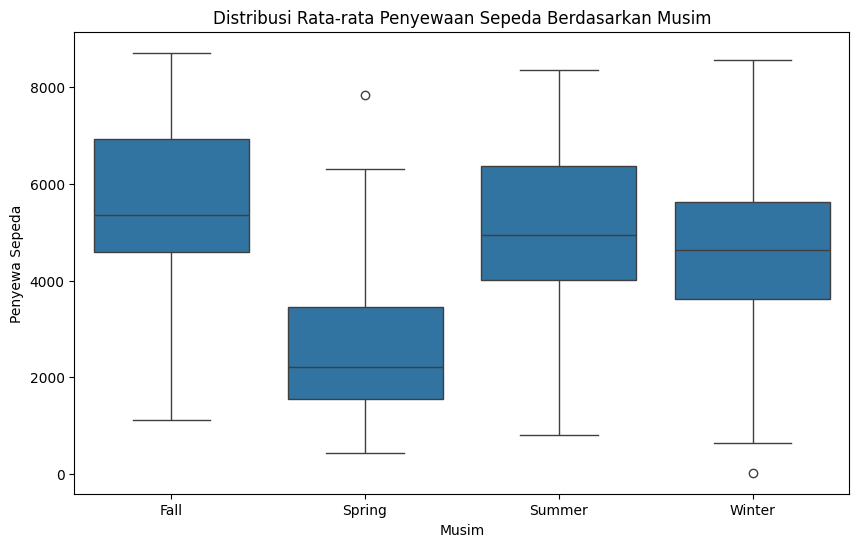

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribusi Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Penyewa Sepeda')
plt.show()

Dari hasil visualisasi diatas menunjukan bahwa musim mempengaruhi penyewaan sepeda dengan *fall* memiliki penyewa paling banyak sedangkan *winter* memiliki penyewa paling rendah.

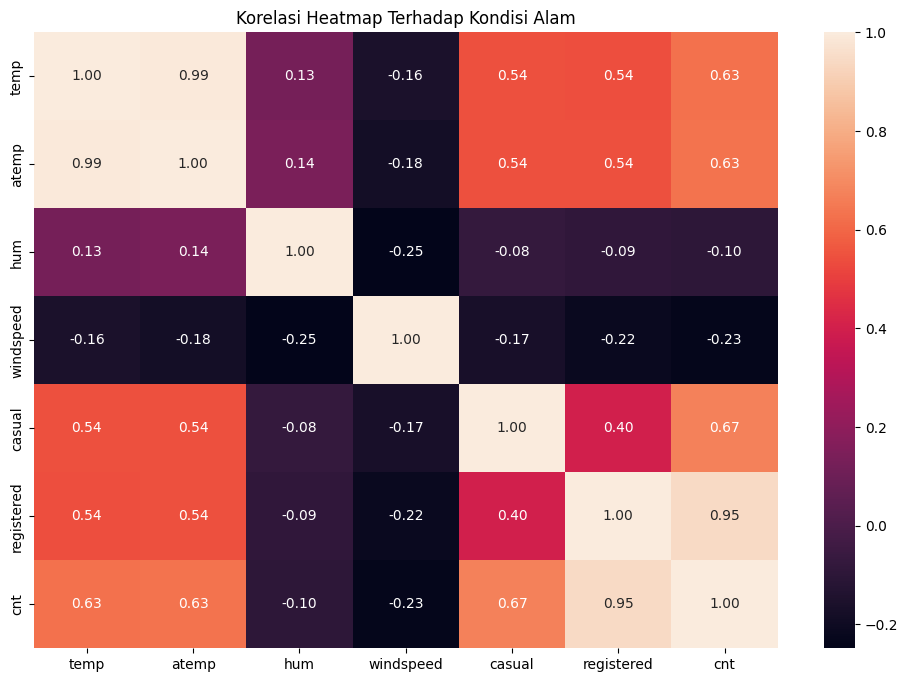

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
correlation_matrix = day_df.drop(columns='instant').corr(numeric_only=True)

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f")

plt.title("Korelasi Heatmap Terhadap Kondisi Alam")
plt.show()

Dari hasil visualisasi diatas menunjukan bahwa terdapat korelasi positif yang kuat antara **temp** (suhu) dan **atemp** (suhu yang terasa) dengan total penyewaan sepeda (**cnt**), yaitu sebesar 0.63.

**hum** (kelembapan) memiliki korelasi negatif dengan total penyewaan sepeda (**cnt**) sebesar (-0.10), namun dampaknya tidak terlalu signifikan.

**windspeed** (kecepatan angin) memiliki korelasi negatif dengan total penyewaan sepeda (**cnt**) sebesar (-0.23), namun dampaknya tidak terlalu signifikan.

### Pertanyaan 2:

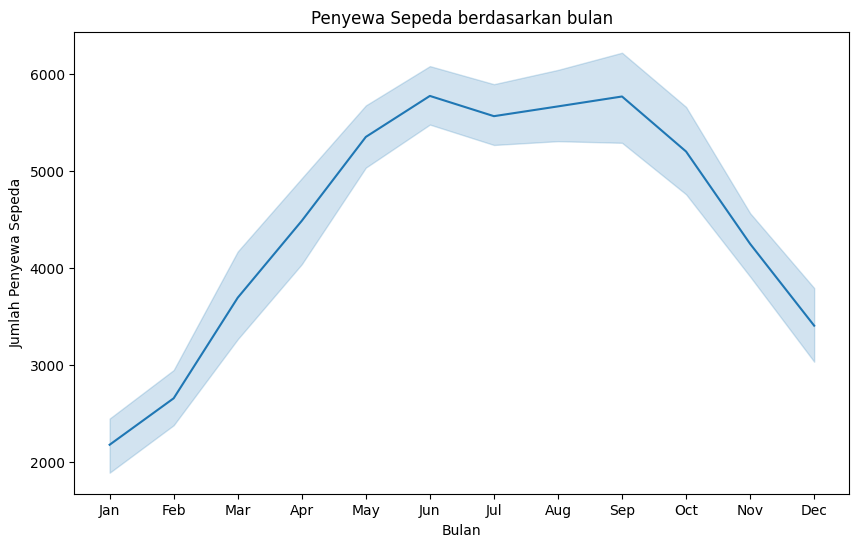

In [28]:
order_bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=order_bulan, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df)
plt.title('Penyewa Sepeda berdasarkan bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

Grafik penyewa sepeda dari waktu ke waktu menunjukkan tren umum penggunaan sepeda yang naik turun sepanjang tahun. Jumlah penyewa sepeda akan dimulai dengan jumlah yang cukup rendah di bulan januari dan akan naik sampai bulan may namun pada bulan oktober jumlah penyewa sepeda akan turun lagi sampai bulan desember.

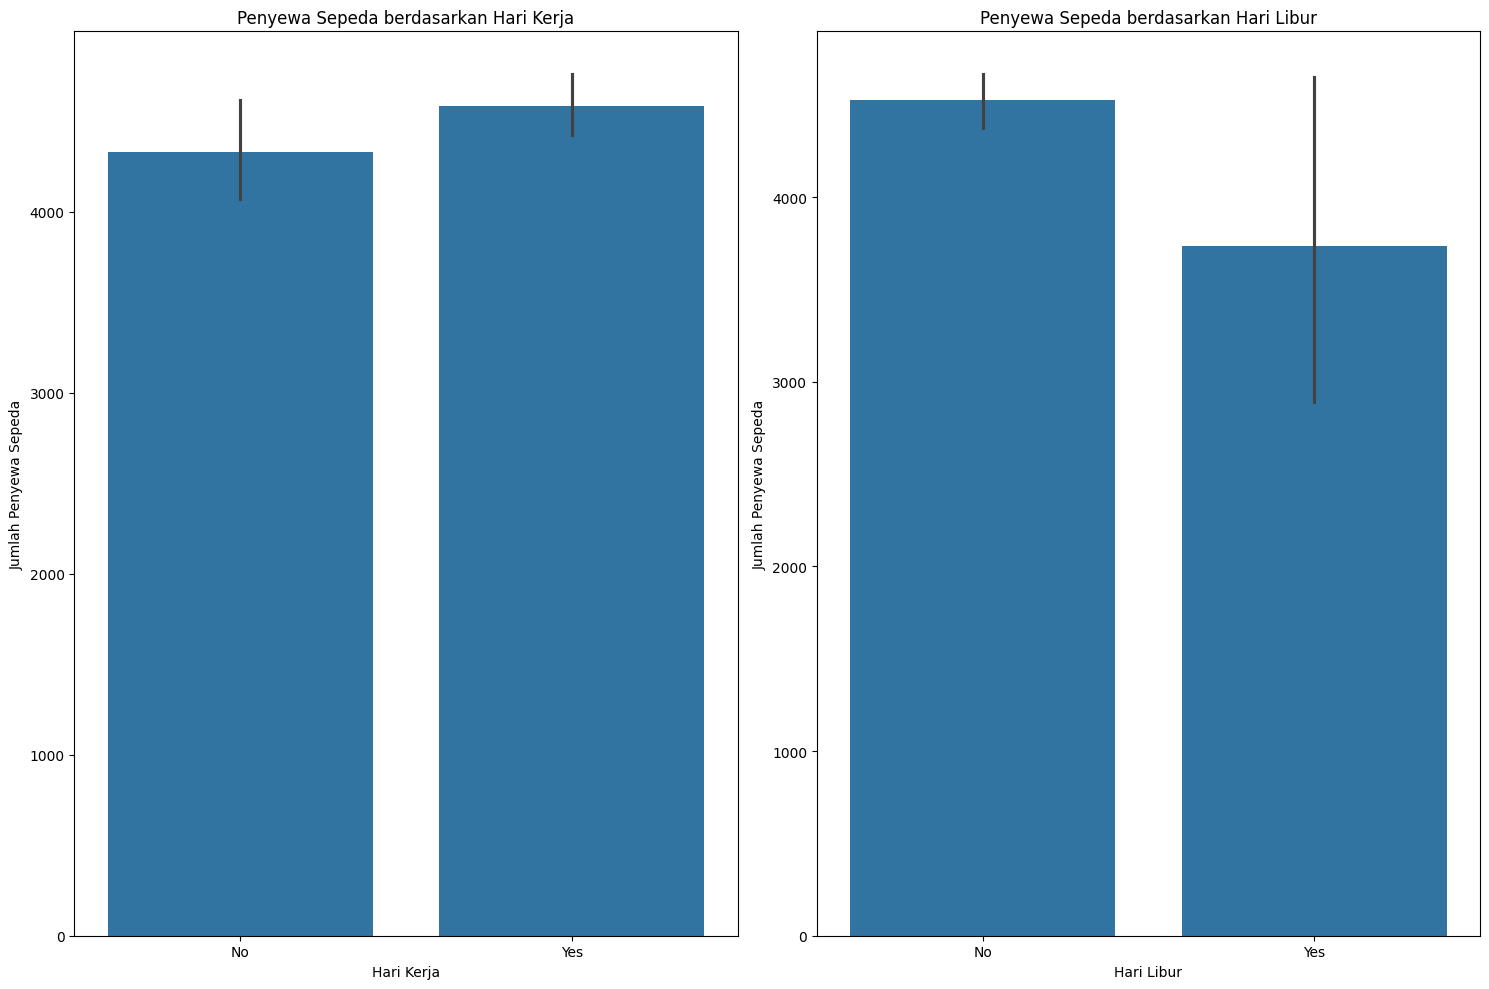

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(x='workingday', y='cnt', data=day_df, ax=axes[0])
axes[0].set_title('Penyewa Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Penyewa Sepeda')

# Berdasarkan holiday
sns.barplot(x='holiday', y='cnt', data=day_df, ax=axes[1])
axes[1].set_title('Penyewa Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Penyewa Sepeda')

plt.tight_layout()
plt.show()

Dari hasil visualisasi dapat dilihat bahwa penyewa sepeda lebih banyak pada hari kerja(senin-jumat) dibandingkan pada akhir pekan(sabtu-minggu). Penyewa sepeda juga lebih banyak pada hari biasa dibandingkan dengan hari libur.

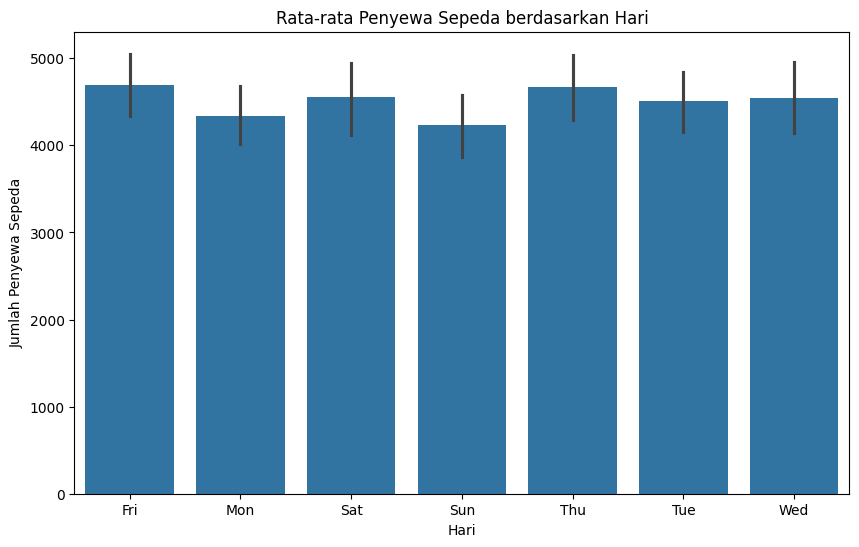

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=day_df)
plt.title('Rata-rata Penyewa Sepeda berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

Dari hasil visualisasi diatas menunjukan bahwa penyewaan sepeda pada hari jumat memiliki penyewa paling banyak sedangkan pada hari minggu memiliki penyewa paling rendah.

## Conclusion

- Conclution pertanyaan 1

**Pengaruh Cuaca**: Cuaca yang cerah atau sedikit berawan cenderung meningkatkan jumlah penyewaan sepeda dengan rata-rata sebesar 4876 penyewa, sementara kondisi hujan ringan atau salju menurunkan penyewaan secara drastis dengan rata-rata 1803 penyewa. Kondisi berkabut atau berawan berada di tengah-tengah dengan rata-rata 4035 penyewa.

**Pengaruh Musim**: Musim gugur adalah musim dengan jumlah penyewaan sepeda tertinggi dengan rata-rata 5644 penyewa. Sementara musim semi cenderung memiliki jumlah penyewaan yang terendah dengan rata-rata 2604.

**Pengaruh Suhu**: Korelasi positif yang kuat antara suhu (temp) dan jumlah penyewaan sepeda (cnt) sebesar 0.63 menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menyewa sepeda. Ini masuk akal karena bersepeda adalah aktivitas luar ruangan yang lebih nyaman dalam cuaca hangat.

**Pengaruh Kecepatan Angin dan Kelembaban**: Kecepatan angin (windspeed) dan kelembaban (hum) memiliki korelasi negatif terhadap penyewaan sepeda sebesar -0.23 dan -0.10. Ini menunjukkan bahwa kondisi angin kencang atau kelembaban tinggi mungkin mengurangi minat orang untuk bersepeda.
- Conclution pertanyaan 2

**Grafik jumlah penyewa sepeda berdasarkan hari kerja** menunjukkan bahwa jumlah penyewa sepeda pada hari kerja (senin-jumat) dengan rata-rata 4584 **lebih banyak** dibandingkan pada akhir pekan (sabtu-minggu) dengan rata-rata 4330.

**Grafik jumlah penyewa sepeda berdasarkan hari libur** menunjukkan bahwa jumlah penyewa sepeda pada hari biasa dengan rata-rata 4527 **lebih banyak** dibandingkan pada hari biasa dengan rata-rata 3735.

**Grafik jumlah penyewa sepeda berdasarkan hari** menunjukkan bahwa hari jumat menempati posisi teratas dengan rata-rata 4690 penyewa sepeda sedangkan hari minggu terendah dengan rata-rata 4228 penyewa.
